<br>
<br>
**<font size=8><center>Milestone 4</center></font>**

**<font size=6>Introduction</font>**

Below are four baseline models for the Lending Club analysis. These are simple models that treat the problem as binary classification. The outcomes can either be "default" or "not default". These models take simplicitic views of the problem and serve as baselines for comparison and sanity check when more sofisiticated models are built in later parts of the project.

The models are:
1. predict all outcomes to be "not default";
2. predict all outcomes of borrowers with lowest credit scores to always :default" and others "not default";
3. model outcomes with a single predictor "grade";
4. model outcomes with a single predictor "interest rate".

The data cleaning steps are from milestone 3.

### Authors:
Devon Luongo <br>
Ankit Agarwal <br>
Bryn Clark <br>
Ben Yuen

### Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy
%matplotlib inline

#new imports for milestone 4
import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, make_scorer

In [2]:
path = "/home/ankit/anaconda2/pkgs/basemap-1.0.7-np111py27_0/lib/python2.7/site-packages/mpl_toolkits/basemap/data/"

**<font size=6>Data Cleaning</font>**

Some of the data files have fields that contain NAs for older time periods. In order to collapse the data sets into one file, all numerical data will be stored in float fields (integer fields do not support NA missing values). To do this, we first define a conversion dictionary that stores the numeric fields with lookups to the *float* data type.

In [3]:
convert_float = dict([s, float] for s in
                     ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
                      'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',                      
                      'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
                      'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                      'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                      'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                      'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                      'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 
                      'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
                      'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
                      'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                      'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
                      'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
                      'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
                      'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
                      'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                      'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                      'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
                      'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
                      'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

We also define a dictionary of string fields, to handle situations where the inferred data type might be numeric even though the field should be read in as a string/object.

In [4]:
convert_str = dict([s, str] for s in
                    ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
                     'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 
                     'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 
                     'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
                     'policy_code', 'application_type', 'verification_status_joint'])

We read the input data from the CSV data files using pandas *read_csv*. There is a blank row in the data header and there are two blank rows in the footer of each file. To allow the use of *skip_footer*, we use the python engine rather than the C engine. The first two columns (*id* and *member_id*) are unique and used to create a table index.

In [5]:
data_2007_2011 = pd.read_csv("./data/LoanStats3a.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data_2014 = pd.read_csv("./data/LoanStats3b.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data_2015 = pd.read_csv("./data/LoanStats3c.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data = pd.read_csv("./data/LoanStats3d.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

In [6]:
print "Data table dimensions 2007-2011: %d x %d" % data_2007_2011.shape

print "Data table dimensions 2014: %d x %d" % data_2014.shape
 
print "Data table dimensions 2015: %d x %d" % data_2015.shape

print "Data table dimensions 2016: %d x %d" % data.shape

Data table dimensions 2007-2011: 42536 x 109
Data table dimensions 2014: 188181 x 109
Data table dimensions 2015: 235629 x 109
Data table dimensions 2016: 421095 x 109


In [7]:
data.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
68516507,73406314,14000,14000,14000,36 months,9.80%,450.43,B,B3,Master mechanic,4 years,...,0,2,100.0,0.0,0,0,531602,84039,34500,55842
68587652,73477494,25000,25000,25000,36 months,5.32%,752.87,A,A1,Director,1 year,...,0,1,100.0,0.0,0,0,512381,44786,44000,51081
68009401,72868139,16000,16000,16000,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,...,0,2,78.9,0.0,0,2,298100,31329,281300,13400
68416935,73306760,15000,15000,15000,36 months,9.80%,482.61,B,B3,Electronic Branch Manager,3 years,...,0,4,100.0,0.0,1,0,347470,53397,36100,47370
68357012,73246847,15000,15000,15000,36 months,8.49%,473.45,B,B1,Senior Associate,6 years,...,0,4,100.0,20.0,1,0,369112,27849,28200,21124


In [8]:
data_2015.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,...,0,4,100.0,0.0,0,0,196500,149140,10000,12000
36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,...,0,4,83.3,14.3,0,0,179407,15030,13000,11325
37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,...,0,3,100.0,60.0,0,0,52490,38566,21100,24890
37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,...,0,0,76.9,100.0,0,0,368700,18007,4400,18000
37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,...,0,2,100.0,100.0,0,0,82331,64426,4900,64031


Check the count of fields by data type:

In [9]:
data_2014.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
10159611,12011228,10000,10000,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,...,0.0,1.0,77.3,66.7,0,0,58486.0,39143.0,9200.0,36186.0
10129477,11981093,14000,14000,14000.0,36 months,12.85%,470.71,B,B4,Assistant Director - Human Resources,4 years,...,0.0,0.0,78.6,100.0,1,0,31840.0,17672.0,3900.0,27340.0
10149342,12000897,27050,27050,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,0.0,1.0,100.0,25.0,0,0,138554.0,70186.0,35700.0,33054.0
10139658,11991209,12000,12000,12000.0,36 months,13.53%,407.40,B,B5,On road manager,10+ years,...,0.0,2.0,81.2,33.3,0,0,18130.0,13605.0,7000.0,10030.0
10159548,12011167,15000,15000,15000.0,36 months,8.90%,476.30,A,A5,aircraft maintenance engineer,2 years,...,0.0,0.0,89.3,66.7,0,0,288195.0,39448.0,14200.0,33895.0


In [10]:
data_2007_2011.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
print data_2007_2011.dtypes.value_counts()
print
print data_2014.dtypes.value_counts()
print
print data_2015.dtypes.value_counts()
print
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

float64    69
object     26
int64      14
dtype: int64

float64    43
int64      40
object     26
dtype: int64



float64    43
int64      40
object     26
dtype: int64

Depending on the specific dataset used, the numeric values may be read in as integers. For best performance and to enable mergining of the datasets, we convert those fields to floats (which allow NaN values):

In [12]:
for k, v in convert_float.items():
    data_2007_2011[k] = data_2007_2011[k].astype(v)
    data_2014[k] = data_2014[k].astype(v)
    data_2015[k] = data_2015[k].astype(v)
    data[k] = data[k].astype(v)

Checking the data types after the float conversion:

In [13]:
print data_2007_2011.dtypes.value_counts()
print
print data_2014.dtypes.value_counts()
print
print data_2015.dtypes.value_counts()
print
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

float64    83
object     26
dtype: int64

float64    83
object     26
dtype: int64



float64    83
object     26
dtype: int64

The object fields need some more processing. First, we list out those fields:

In [14]:
data.dtypes[data.dtypes=="object"]
data_2007_2011.dtypes[data_2007_2011.dtypes=="object"]
data_2014.dtypes[data_2014.dtypes=="object"]
data_2015.dtypes[data_2015.dtypes=="object"]

term                         object
int_rate                     object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
earliest_cr_line             object
revol_util                   object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
policy_code                  object
application_type             object
verification_status_joint    object
dtype: object

There are 5 object fields that contain dates in the format *YYYY-MMM* (e.g. '2010-Jan'). We parse those to return datetime fields, which are more easily input into time series models or plotted in charts.

In [15]:
data.issue_d = pd.to_datetime(data.issue_d, errors="coerce")
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, errors="coerce")
data.next_pymnt_d = pd.to_datetime(data.next_pymnt_d, errors="coerce")
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, errors="coerce")
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, errors="coerce")

data_2007_2011.issue_d = pd.to_datetime(data_2007_2011.issue_d, errors="coerce")
data_2007_2011.last_pymnt_d = pd.to_datetime(data_2007_2011.last_pymnt_d, errors="coerce")
data_2007_2011.next_pymnt_d = pd.to_datetime(data_2007_2011.next_pymnt_d, errors="coerce")
data_2007_2011.last_credit_pull_d = pd.to_datetime(data_2007_2011.last_credit_pull_d, errors="coerce")
data_2007_2011.earliest_cr_line = pd.to_datetime(data_2007_2011.earliest_cr_line, errors="coerce")

data_2014.issue_d = pd.to_datetime(data_2014.issue_d, errors="coerce")
data_2014.last_pymnt_d = pd.to_datetime(data_2014.last_pymnt_d, errors="coerce")
data_2014.next_pymnt_d = pd.to_datetime(data_2014.next_pymnt_d, errors="coerce")
data_2014.last_credit_pull_d = pd.to_datetime(data_2014.last_credit_pull_d, errors="coerce")
data_2014.earliest_cr_line = pd.to_datetime(data_2014.earliest_cr_line, errors="coerce")

data_2015.issue_d = pd.to_datetime(data_2015.issue_d, errors="coerce")
data_2015.last_pymnt_d = pd.to_datetime(data_2015.last_pymnt_d, errors="coerce")
data_2015.next_pymnt_d = pd.to_datetime(data_2015.next_pymnt_d, errors="coerce")
data_2015.last_credit_pull_d = pd.to_datetime(data_2015.last_credit_pull_d, errors="coerce")
data_2015.earliest_cr_line = pd.to_datetime(data_2015.earliest_cr_line, errors="coerce")

Many of the remaining fields contain categorical data. We use the pandas *category* data type to store the data more efficiently.

In [16]:
data.term = pd.Categorical(data.term, categories= [" 36 months", " 60 months", "None"])
data.grade = pd.Categorical(data.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data.sub_grade = pd.Categorical(data.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data.home_ownership = pd.Categorical(data.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data.emp_length = pd.Categorical(data.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data.verification_status = pd.Categorical(data.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data.loan_status = pd.Categorical(data.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data.pymnt_plan = pd.Categorical(data.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data.purpose = pd.Categorical(data.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data.addr_state = pd.Categorical(data.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data.initial_list_status = pd.Categorical(data.initial_list_status, categories=["f", "w", "None"])
data.policy_code = pd.Categorical(data.policy_code, categories=["1", "None"])
data.application_type = pd.Categorical(data.application_type.str.title(), categories=["Individual", "Joint", "None"])
data.verification_status_joint = pd.Categorical(data.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [17]:
data_2007_2011.term = pd.Categorical(data_2007_2011.term, categories= [" 36 months", " 60 months", "None"])
data_2007_2011.grade = pd.Categorical(data_2007_2011.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2007_2011.sub_grade = pd.Categorical(data_2007_2011.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2007_2011.home_ownership = pd.Categorical(data_2007_2011.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2007_2011.emp_length = pd.Categorical(data_2007_2011.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2007_2011.verification_status = pd.Categorical(data_2007_2011.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2007_2011.loan_status = pd.Categorical(data_2007_2011.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2007_2011.pymnt_plan = pd.Categorical(data_2007_2011.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2007_2011.purpose = pd.Categorical(data_2007_2011.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2007_2011.addr_state = pd.Categorical(data_2007_2011.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2007_2011.initial_list_status = pd.Categorical(data_2007_2011.initial_list_status, categories=["f", "w", "None"])
data_2007_2011.policy_code = pd.Categorical(data_2007_2011.policy_code, categories=["1", "None"])
data_2007_2011.application_type = pd.Categorical(data_2007_2011.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2007_2011.verification_status_joint = pd.Categorical(data_2007_2011.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [18]:
data_2014.term = pd.Categorical(data_2014.term, categories= [" 36 months", " 60 months", "None"])
data_2014.grade = pd.Categorical(data_2014.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2014.sub_grade = pd.Categorical(data_2014.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2014.home_ownership = pd.Categorical(data_2014.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2014.emp_length = pd.Categorical(data_2014.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2014.verification_status = pd.Categorical(data_2014.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2014.loan_status = pd.Categorical(data_2014.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2014.pymnt_plan = pd.Categorical(data_2014.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2014.purpose = pd.Categorical(data_2014.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2014.addr_state = pd.Categorical(data_2014.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2014.initial_list_status = pd.Categorical(data_2014.initial_list_status, categories=["f", "w", "None"])
data_2014.policy_code = pd.Categorical(data_2014.policy_code, categories=["1", "None"])
data_2014.application_type = pd.Categorical(data_2014.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2014.verification_status_joint = pd.Categorical(data_2014.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [19]:
data_2015.term = pd.Categorical(data_2015.term, categories= [" 36 months", " 60 months", "None"])
data_2015.grade = pd.Categorical(data_2015.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2015.sub_grade = pd.Categorical(data_2015.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2015.home_ownership = pd.Categorical(data_2015.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2015.emp_length = pd.Categorical(data_2015.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2015.verification_status = pd.Categorical(data_2015.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2015.loan_status = pd.Categorical(data_2015.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2015.pymnt_plan = pd.Categorical(data_2015.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2015.purpose = pd.Categorical(data_2015.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2015.addr_state = pd.Categorical(data_2015.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2015.initial_list_status = pd.Categorical(data_2015.initial_list_status, categories=["f", "w", "None"])
data_2015.policy_code = pd.Categorical(data_2015.policy_code, categories=["1", "None"])
data_2015.application_type = pd.Categorical(data_2015.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2015.verification_status_joint = pd.Categorical(data_2015.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

To validate the categorical data conversion, we check a table listing Null values for each field. If any categories were excluded inadvertently, the *Null Count* in this table would show up as > 0. The *verification_status_joint* field does not appear to contain valid data for the datasets that have been analyzed.

In [20]:
pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

,Categorical Field,Null Count
0,term,0
1,grade,0
2,sub_grade,0
3,emp_length,0
4,home_ownership,0
5,verification_status,0
6,loan_status,0
7,pymnt_plan,0
8,purpose,0
9,addr_state,0


In [21]:
print pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

print pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

print pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

            Categorical Field  Null Count
0                        term           0
1                       grade           0
2                   sub_grade           0
3                  emp_length           0
4              home_ownership           0
5         verification_status           0
6                 loan_status           0
7                  pymnt_plan           0
8                     purpose           0
9                  addr_state           0
10        initial_list_status           0
11                policy_code           0
12           application_type           0
13  verification_status_joint      420584
            Categorical Field  Null Count
0                        term           0
1                       grade           0
2                   sub_grade           0
3                  emp_length           0
4              home_ownership           0
5         verification_status           0
6                 loan_status           0
7                  pymnt_plan     

Some percentages are stored as strings (*int_rate*, *revol_util*). Here we convert them into a float by stripping the % symbol and dividing by 100.

In [22]:
def percent_to_float(s):
    if (type(s) == str):
        if ("%" in s):
            return float(str(s).strip("%"))/100
        else:
            if s == "None":
                return np.nan
            else:            
                return s
    else:
        return s

data.int_rate = [percent_to_float(s) for s in data.int_rate]
data.revol_util = [percent_to_float(s) for s in data.revol_util]

data_2007_2011.int_rate = [percent_to_float(s) for s in data_2007_2011.int_rate]
data_2007_2011.revol_util = [percent_to_float(s) for s in data_2007_2011.revol_util]

data_2014.int_rate = [percent_to_float(s) for s in data_2014.int_rate]
data_2014.revol_util = [percent_to_float(s) for s in data_2014.revol_util]

data_2015.int_rate = [percent_to_float(s) for s in data_2015.int_rate]
data_2015.revol_util = [percent_to_float(s) for s in data_2015.revol_util]

Final check of data types:

In [23]:
data.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [24]:
data_2007_2011.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [25]:
data_2014.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [26]:
data_2015.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

The 5 remaining object fields are note easily parsed to a more convenient data structure. Those fields are listed in the table below:

In [27]:
data.select_dtypes(include=["object"]).head()
data_2007_2011.select_dtypes(include=["object"]).head()
data_2014.select_dtypes(include=["object"]).head()
data_2015.select_dtypes(include=["object"]).head()

,,emp_title,url,desc,title,zip_code
id,member_id,,,,,
38098114,40860827,MANAGEMENT,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,235xx
36805548,39558264,Truck Driver Delivery Personel,https://lendingclub.com/browse/loanDetail.acti...,NaN,Credit card refinancing,937xx
37822187,40585251,Admin Specialist,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,077xx
37612354,40375473,Senior Sales Professional,https://lendingclub.com/browse/loanDetail.acti...,NaN,Car financing,953xx
37662224,40425321,Technical Specialist,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,850xx


In [28]:
print data.shape
print data_2007_2011.shape
fulldf = pd.concat([data, data_2007_2011, data_2014, data_2015])
print fulldf.shape

(421095, 109)
(42536, 109)
(887441, 109)


In [29]:
print np.unique(fulldf["loan_status"].values)

['Charged Off' 'Current' 'Default'
 'Does not meet the credit policy. Status:Charged Off'
 'Does not meet the credit policy. Status:Fully Paid' 'Fully Paid'
 'In Grace Period' 'Late (16-30 days)' 'Late (31-120 days)' 'None']


In [30]:
# Ok we dont want current or None status as we don't know what is going to happen with those.
# next also late and grace period we are not sure about.
# thirdly we remove loans that do not meet credit policy so we can convert our issue to a binar model
fulldf = fulldf[((fulldf["loan_status"] == "Default") | (fulldf["loan_status"] == "Fully Paid"))]
print fulldf.shape
print np.unique(fulldf["loan_status"].values)

fulldf.dropna()
print fulldf.shape

(315324, 109)
['Default' 'Fully Paid']
(315324, 109)


In [31]:
y = fulldf["loan_status"].values
X = fulldf.drop("loan_status", axis=1)
cols = X.columns
for col in cols:
    if X[col].dtype != "float64":
        X = X.drop(col, axis=1)
print X.shape

(315324, 85)


### Baseline Data

To build our baselines, we first check the class proportions of our target categories. Since we are looking at classifying 'default' vs 'not default' our filtered data set has:

In [32]:
print 'Unique loan_status value:', np.unique(fulldf.loan_status)
print 'Default ratio:', float(len(fulldf[fulldf.loan_status == 'Default'])) / fulldf.shape[0]
print 'Unique credit grades', np.unique(fulldf.grade)
print 'Interest Rate Range', np.min(fulldf.int_rate), np.max(fulldf.int_rate)

Unique loan_status value: ['Default' 'Fully Paid']
Default ratio: 0.000418617041519
Unique credit grades ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Interest Rate Range 0.0532 0.2899


As expected, the class proportions are highly imbalanced as defaults are not common.

It is therefore reasonable to simply build our first baseline to predict every lone does not default.

### Baseline 1: All loans do not default

In [33]:
def evaluate(y_true, y_pred):
    print 'Overall Accuracy:', accuracy_score(y_true, y_pred)
    print 'F1 Score:', f1_score(y_true, y_pred)
    #setting "0" as positive case to indicate we are looking for "Default" cases
    print 'F1 Score (0 as "positive" since we are looking for "Default" cases):', f1_score(y_true, y_pred, pos_label=0)
    #pos_labe='None' is required: see https://github.com/scikit-learn/scikit-learn/issues/3122
    print 'Weighted average F1 Score:', f1_score(y_true, y_pred, pos_label=None, average='weighted')
    print 'Micro average F1 Score:', f1_score(y_true, y_pred, pos_label=None, average='micro')
    print 'Macro average F1 Score:', f1_score(y_true, y_pred, pos_label=None, average='macro')
    for i in np.unique(y_true):
        y_class_true = y_true[y_true == i]
        y_class_pred = y_pred[y_true == i]
        print 'Class {:.0f} Accuracy:'.format(i), accuracy_score(y_class_true, y_class_pred)

In [34]:
y = pd.get_dummies(fulldf.loan_status)
y.head()

,,Fully Paid,Current,Charged Off,Does not meet the credit policy. Status:Fully Paid,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Default,None
id,member_id,,,,,,,,,,
68416935,73306760.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68357012,73246847.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68466916,73356753.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68577849,73467703.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68407301,73297138.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#create response: we only take the first column from the one-hot encoded loan_status
#since we only need to know if a loan is fully paid or not
y = y.values[:, 0]

In [36]:
#baseline model 1:
#predicting all loan outcomes as "not default"
def predict_outcome_baseline1(X):
    results = np.empty(shape=(X.shape[0]), dtype=float)
    results[:] = 1
    return results

In [37]:
y_pred = predict_outcome_baseline1(np.zeros([y.shape[0],1]))
evaluate(y, y_pred)

Overall Accuracy: 0.999581382958
F1 Score: 0.99979064766
F1 Score (0 as "positive" since we are looking for "Default" cases):

/home/ben/anaconda3/envs/cs109a_proj/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ben/anaconda3/envs/cs109a_proj/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.0
Weighted average F1 Score: 0.999372118257
Micro average F1 Score: 0.999581382958
Macro average F1 Score: 0.49989532383
Class 0 Accuracy: 0.0
Class 1 Accuracy: 1.0


This model has high overall accuracy becuase most loans do not default. However, the class 0 (default) breakdown shows that this model's accuracy on default loans is 0.

### Baseline 2: Predicting loans with lowest credit scores to default

In this model, we set a threshold of credit grade E and below to be a bad credit score. All loans with these scores are predicted as "default" while all others are predicted as "not default".

In [38]:
#baseline model 2:
#predicting all loan outcomes as "not default"
def predict_outcome_baseline2(X):
    #We take the credit grades E, F and G
    #as "bad" credit scores
    #we do this by summing up the corresponding one-hot encoded columns
    results = X[:, -4:-1].sum(axis=1).reshape(-1, 1)
    #we need to the swap 0s and 1s to match the response encoding
    results = -1 * ( results - 1 )
    return results

In [39]:
X = pd.get_dummies(fulldf.grade)
X.head()

,,A,B,C,D,E,F,G,None
id,member_id,,,,,,,,
68416935,73306760.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68357012,73246847.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68466916,73356753.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68577849,73467703.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68407301,73297138.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
y_pred = predict_outcome_baseline2(X.values)
evaluate(y, y_pred)

Overall Accuracy: 0.911230987809
F1 Score: 0.95355031206
F1 Score (0 as "positive" since we are looking for "Default" cases): 0.00171190128036
Weighted average F1 Score: 0.95315185628
Micro average F1 Score: 0.911230987809
Macro average F1 Score: 0.47763110667
Class 0 Accuracy: 0.181818181818
Class 1 Accuracy: 0.911536460316


This model has better (compared to baseline 1) prediction accuracy for default (class 0) loans. However, the values are still very low.

Changing the threshold should allow us to trade accuracies of prediction of the two classes.

### Baseline 2 descision tree comparison

It would be interesting to see what a decision tree would pick as a threshold for this simplistic model.

To do this, we encode the grade predictor as ordinal values and let the decision tree to pick a split point. We limit the depth to 1 to similate our decision process of the baseline model above.

In [41]:
# https://github.com/JWarmenhoven/ISLR-python
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [42]:
print 'Categories of "grade" column:', [x for x in fulldf.grade.cat.categories]
print 'Number of rows with grade=None:', len(fulldf[fulldf.grade=='None'])

Categories of "grade" column: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'None']
Number of rows with grade=None: 0


Since we do not have "None" values, our grades provide a sensible ordering.

In [43]:
#here we encode the categorical loan_status column as numberic values
#as the categories are ordinal
X = fulldf.grade.cat.codes
X.head()

id        member_id 
68416935  73306760.0    1
68357012  73246847.0    1
68466916  73356753.0    0
68577849  73467703.0    2
68407301  73297138.0    2
dtype: int8

In [44]:
X = X.reshape(-1, 1)

In [45]:
#use scikit-learn decision tree and set class_weight to handle the imbalance
tree = DecisionTreeClassifier(class_weight='balanced', max_depth=1)
tree.fit(X, y)
y_pred = tree.predict(X)
evaluate(y, y_pred)

Overall Accuracy: 0.509127120042
F1 Score: 0.674596567354
F1 Score (0 as "positive" since we are looking for "Default" cases): 0.00126467931346
Weighted average F1 Score: 0.674314699151
Micro average F1 Score: 0.509127120042
Macro average F1 Score: 0.337930623334
Class 0 Accuracy: 0.742424242424
Class 1 Accuracy: 0.50902941699


With the "balanced" option, scikit-learn decision tree has set a threshold so that the prediction accuracies of the two classes to be more comparable.

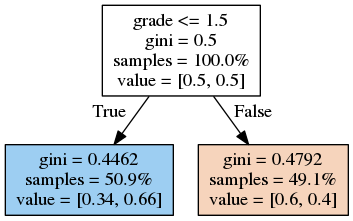

In [46]:
graph = print_tree(tree, ['grade'])
Image(graph.create_png())

The split chosen (1.5) corresponds to a boundary between grades B and C.